# Visualizing ECM

In [24]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
os.getcwd()

'/home/ewershof/Repos/FibroblastMatrixModel/cellMatrixModel'

In [25]:
def read_first_matching_file(directory, part_of_id):
    """
    Reads the first file in the directory containing the specified substrings.

    Args:
        directory (str): Path to the directory to search.
        part_of_id (str): A substring to look for in the filename.
        substring (str): Another substring to look for in the filename.

    Returns:
        pd.DataFrame or None: DataFrame containing the file's content if found, otherwise None.
    """
    # Initialize variables
    substring = 'FibreBox.txt'
    file_path = None

    # Loop through files in the directory
    for filename in os.listdir(directory):
        if part_of_id in filename and substring in filename:
            file_path = os.path.join(directory, filename)
            break  # Stop after finding the first match

    # Check if a matching file was found
    if file_path:
        print(f"First matching file: {file_path}")

        # Read the file as a CSV
        try:
            data = pd.read_csv(file_path, sep='\t', header=None)  # Update delimiter if necessary
            data.columns = ['boxD', 'frame', 'x', 'y', 'theta', 'density']
            print("Data loaded successfully.")
            return data
        except Exception as e:
            print(f"Error reading file: {e}")
            return None
    else:
        print("No matching file found in the specified directory.")
        return None


In [30]:
directory = os.getcwd()
run_id = '3217648789'
data = read_first_matching_file(directory, run_id)

First matching file: /home/ewershof/Repos/FibroblastMatrixModel/cellMatrixModel/File__5-3-19_3217648789.txt_FibreBox.txt
Data loaded successfully.


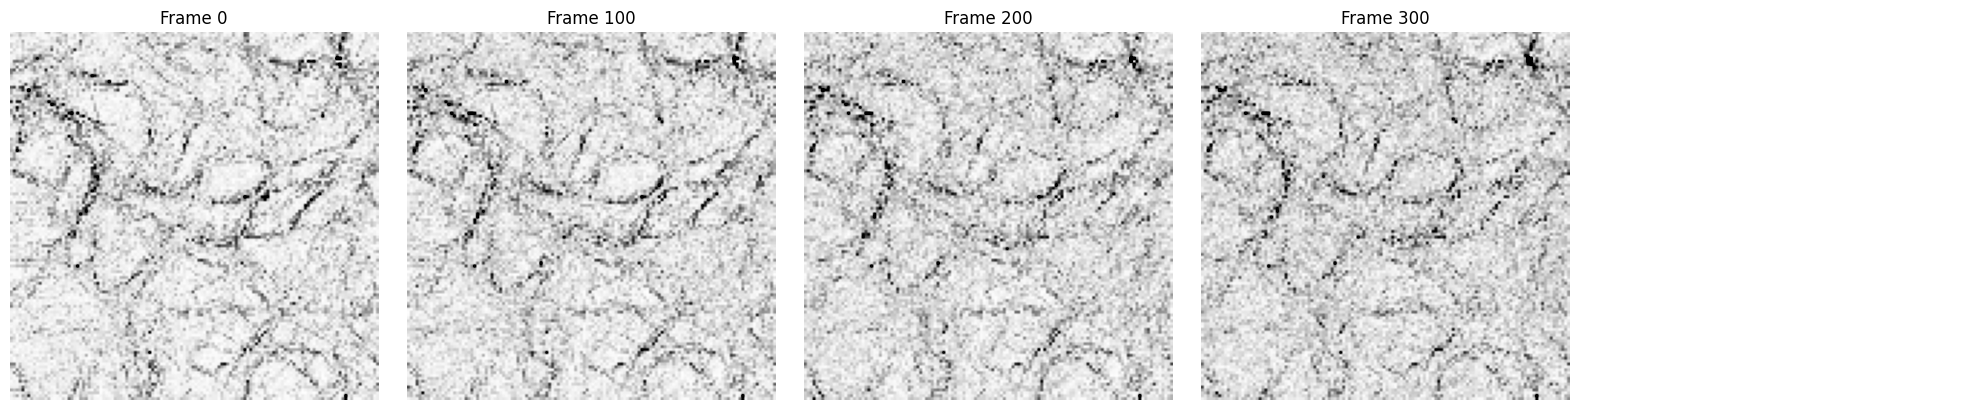

In [31]:

# Get unique frames
frames = data['frame'].unique()

# Image size
size = 128  # Assuming the grid is 128x128 as x and y are 0-127

# Create a figure with subplots
num_frames = len(frames)
cols = 5  # Number of columns in the subplot grid
rows = (num_frames + cols - 1) // cols  # Compute rows needed
fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))

# Flatten axes for easy iteration if there are multiple rows/columns
axes = axes.flatten()

for i, frame in enumerate(frames):
    # Filter data for the current frame
    frame_data = data[data['frame'] == frame]
    
    # Create an empty image
    image = np.zeros((size, size))
    
    # Populate the image
    for _, row in frame_data.iterrows():
        # Set the pixel value based on density
        image[int(row['y']), int(row['x'])] = 100 - row['density']
    
    # Normalize the image to 0-1 for displaying
    image /= 100.0
    
    # Save the individual image as PNG
    plt.imsave(f'{run_id}_{frame}.png', image, cmap='gray', origin='lower', vmax=1,vmin=0)
    
    # Plot on the subplot
    ax = axes[i]
    ax.imshow(image, cmap='gray', origin='lower', vmax=1,vmin=0)
    ax.axis('off')
    ax.set_title(f'Frame {frame}')

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# # Adjust layout and show the full figure
# polarity = '0.3'
# w5 = '0.2'
# IMT = 'AligningMatrixOriginal.txt'

# print(f'polarity={polarity}, w5={w5}, IMT={IMT}')
plt.tight_layout()
plt.show()
